In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')

# データの読み込み
データはKaggleからダウンロードできます。

[New York City Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df = df.loc[:, 'fare_amount': 'pickup_datetime']
df.head()

,fare_amount,pickup_datetime
0,4.5,2009-06-15 17:26:21 UTC
1,16.9,2010-01-05 16:52:16 UTC
2,5.7,2011-08-18 00:35:00 UTC
3,7.7,2012-04-21 04:30:42 UTC
4,5.3,2010-03-09 07:51:00 UTC


# 欠損値の確認

In [4]:
df['pickup_datetime'].isnull().sum()

0

# datetime型へ変換
日時データを扱うときは、まず文字や数字で表現されている日時をdatetime型に変換すると便利です。

datetime型への変換には、pd.to_datetimeメソッドを使うと良いでしょう。引数のformatで書式を設定します。

書式の詳しい設定方法は以下の公式ドキュメントが参考になります。

[8.1. datetime — 基本的な日付型および時間型 —](https://docs.python.jp/3.6/library/datetime.html#strftime-and-strptime-behavior)

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format="%Y-%m-%d %H:%M:%S UTC")
df['pickup_datetime'].head()

0   2009-06-15 17:26:21
1   2010-01-05 16:52:16
2   2011-08-18 00:35:00
3   2012-04-21 04:30:42
4   2010-03-09 07:51:00
Name: pickup_datetime, dtype: datetime64[ns]

# 年月日、曜日を新たなデータとして追加
dayofweekに関しては、０が月曜日、６が日曜日を表します。

In [6]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['year'] = df['pickup_datetime'].dt.year

df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010


# 特定の年月日や曜日だけをとりだす

In [7]:
df[df['year'] == 2012].head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012
6,7.5,2012-11-20 20:35:00,20,20,11,1,2012
7,16.5,2012-01-04 17:22:00,17,4,1,2,2012
8,9.0,2012-12-03 13:10:00,13,3,12,0,2012
10,5.3,2012-04-08 07:30:50,7,8,4,6,2012


# 曜日ごとにデータの分布を確認

Text(0,0.5,'Fare')

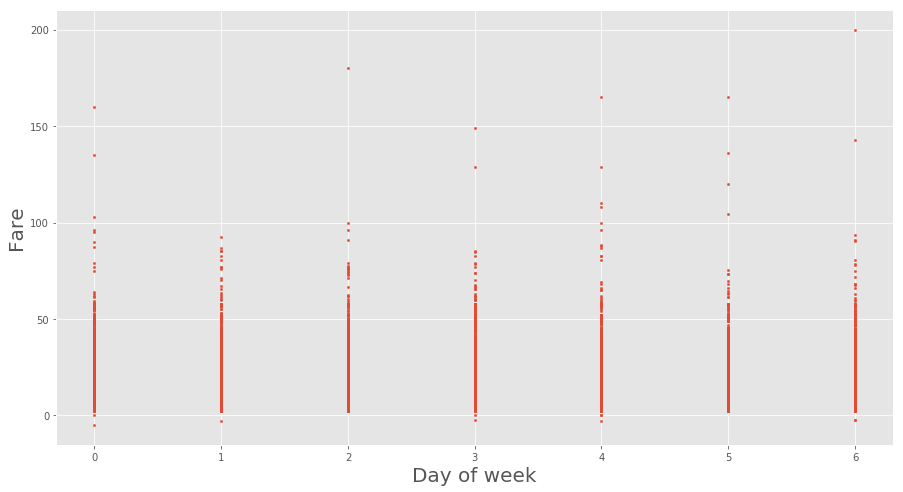

In [8]:
plt.figure(figsize=(15,8))
plt.scatter(df['dayofweek'], df['fare_amount'], s=5)
plt.xlabel('Day of week', fontsize=20)
plt.ylabel('Fare', fontsize=20)

# 時間ごとのデータ数を確認

Text(0,0.5,'Frequency')

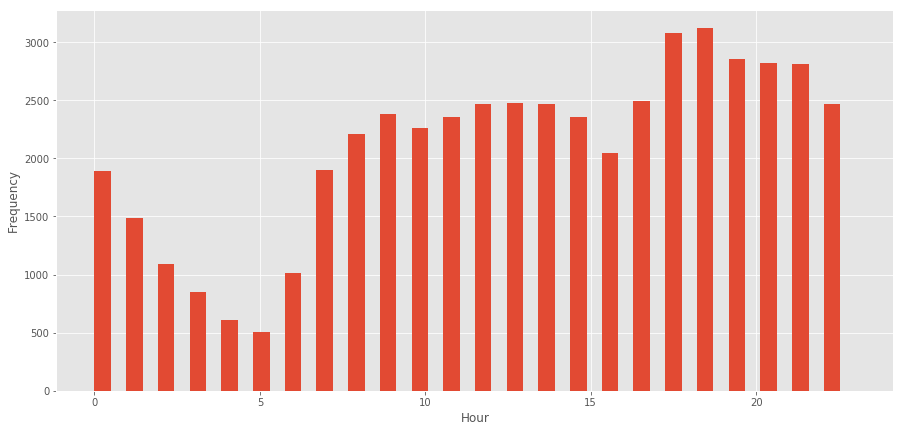

In [9]:
plt.figure(figsize=(15,7))
plt.hist(df['hour'], bins=len(df['hour'].value_counts()), width=0.5)
plt.xlabel('Hour')
plt.ylabel('Frequency')

# 時間の増減
特定の時間を増減させたい場合には、timedeltaを使うと便利です。

今回のデータでは、日時データが１つしかなかったので、一律で30分増加させ'dropoff_datetime'という架空のデータを生成しています。

In [10]:
import datetime as dt

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S UTC")

df['dropoff_datetime'] = df['pickup_datetime'] + dt.timedelta(minutes=30)

df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00


# 時間差を計算
２つの日時データの差を取る場合は、それぞれdatetime型へ変換して引き算を行うだけです。

In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S UTC")
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'],format="%Y-%m-%d %H:%M:%S UTC")

# df['ride_time_m'] = df['dropoff_datetime'].subtract(df['pickup_datetime']).astype('timedelta64[m]')

df['ride_time_m'] = (df['dropoff_datetime'] - df['pickup_datetime']).astype('timedelta64[m]')

df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0


# 休日の判定
土曜、日曜のみを休日とする簡易的な休日判定です。

In [12]:
def judge_holiday(dayofweek):
    return np.where((dayofweek == 5) | (dayofweek == 6), 1, 0)

In [13]:
df['holiday'] = judge_holiday(df['dayofweek'])
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m,holiday
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0


# 次の日が休日であるかを判定
分析する問題によっては、当日が休日であるよりも、次の日が休日であるかが重要な場合もあります。

In [14]:
def judge_next_day_is_holiday(dayofweek):
    return np.where((dayofweek == 4) | (dayofweek == 5), 1, 0)

In [15]:
df['next_day_is_holiday'] = judge_next_day_is_holiday(df['dayofweek'])
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m,holiday,next_day_is_holiday
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0,0
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0,0
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0,0
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1,1
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0,0


# 季節を判定

In [16]:
def judge_season(month):
    if 3 <= month <=5:
        season = 0
    elif 6 <= month <= 8:
        season = 1
    elif 9 <= month <= 11:
        season = 2
    else:
        season = 3
    
    return season

In [17]:
df['season'] = df['month'].apply(judge_season)
df.head()

,fare_amount,pickup_datetime,hour,day,month,dayofweek,year,dropoff_datetime,ride_time_m,holiday,next_day_is_holiday,season
0,4.5,2009-06-15 17:26:21,17,15,6,0,2009,2009-06-15 17:56:21,30.0,0,0,1
1,16.9,2010-01-05 16:52:16,16,5,1,1,2010,2010-01-05 17:22:16,30.0,0,0,3
2,5.7,2011-08-18 00:35:00,0,18,8,3,2011,2011-08-18 01:05:00,30.0,0,0,1
3,7.7,2012-04-21 04:30:42,4,21,4,5,2012,2012-04-21 05:00:42,30.0,1,1,0
4,5.3,2010-03-09 07:51:00,7,9,3,1,2010,2010-03-09 08:21:00,30.0,0,0,0
